I want to generate a box with four aruco tags on each side.
They will be placed in a grid configuration, and should make it reasonably easy to detect the box from any angle.


- https://answers.gazebosim.org//question/23985/change-color-of-one-side-of-box/

In [23]:
%load_ext autoreload
%autoreload 2

import sys

sys.path.insert(0, "../src")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [28]:
from camera import (
    move_camera_pos,
    get_camera_image_rgb,
    get_camera_image_depth,
    draw_aruco_grid,
    extract_aruco_tags,
    draw_aruco_tags,
)
import rospy
import matplotlib.pyplot as plt
import cv2 as cv

base_path = "../models/calibration_box/materials/textures"

# create 6 faces of a cube, in groups of 4
faces = 6
corners = 4
for i in range(faces):
    ids = [(i * corners) + j for j in range(corners)]
    draw_aruco_grid(2, 2, ids=ids, figsize=(5, 5))
    plt.savefig(f"{base_path}/aruco_{i}.png", bbox_inches="tight")
    plt.close()

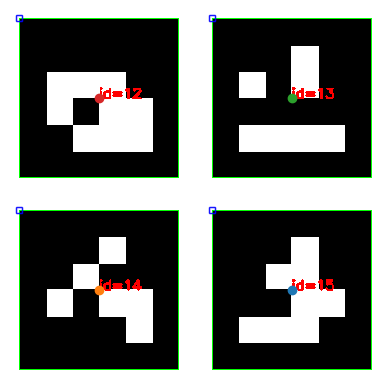

In [27]:
img = cv.imread(f"{base_path}/aruco_3.png")
draw_aruco_tags(*extract_aruco_tags(img))
plt.show()

There's a bit of programming that I need to do in order to build the actual cube.
It'd be tedious to create each side individually, so I'm putting together a jinja template that will help generate the cube for me.

I'm also modifying the materials script to use paramters.

- https://ogrecave.github.io/ogre/api/1.11/_scripts.html#Format